# Imports

Dependecies

In [1]:
import os
import qrcode
import numpy as np
import random

# Binary matrix obtention

In [3]:
qr_code = qrcode.QRCode(border=0)
qr_code.add_data('hey')
qr_code.make(fit=True)
im = qr_code.make_image()

## Obtaining QR matrix as a numpy array

In [4]:
print(type(qr_code.get_matrix()))
qrMatrix = np.array(qr_code.get_matrix()).astype(int)
print(type(qrMatrix))
qrMatrix = qrMatrix.astype(int)
print(qrMatrix)
print(qrMatrix.shape)

<class 'list'>
<class 'numpy.ndarray'>
[[1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1]]
(21, 21)


## Generating transparence base matrixes with numpy

In [5]:
trans_A = np.zeros([x * 2 for x in qrMatrix.shape], dtype=qrMatrix.dtype)
print(trans_A.shape)
print(trans_A)
print(f'Indexed element: {trans_A[3][4]}')

(42, 42)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Indexed element: 0


# Operations with submatrixes

## Some matrix slicing

In [6]:
random_bin = np.random.randint(2, size=4)
print('\nintial sequence')
print(random_bin)
print(type(random_bin))
print(random_bin.shape)
random_bin = np.reshape(random_bin, (2,2))
print('\n2x2 sequence')
print(random_bin)
print(type(random_bin))
print(random_bin.shape)
submatrix = qrMatrix[0:2,0:2]
print('\n1sr 2x2 sequence')
print(submatrix)
print(type(submatrix))
print(submatrix.shape)
submatrix = qrMatrix[2:4,0:2]
print('\n2nd 2x2 sequence')
print(submatrix)
print(type(submatrix))
print(submatrix.shape)


intial sequence
[0 0 1 1]
<class 'numpy.ndarray'>
(4,)

2x2 sequence
[[0 0]
 [1 1]]
<class 'numpy.ndarray'>
(2, 2)

1sr 2x2 sequence
[[1 1]
 [1 0]]
<class 'numpy.ndarray'>
(2, 2)

2nd 2x2 sequence
[[1 0]
 [1 0]]
<class 'numpy.ndarray'>
(2, 2)


## Going through the submatrices inside a matrix

In [8]:
test_matrix = np.copy(qrMatrix)
print(test_matrix)
print(test_matrix.shape)

[[1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1]]
(21, 21)


In [9]:
it = np.nditer(test_matrix, flags=['multi_index'])
submatrix_size = 7
while not it.finished:
    ri = it.multi_index[0] % submatrix_size
    rj = it.multi_index[1] % submatrix_size
    if ri == 0 and rj == 0:
        print(f'value: {it[0]} index: {it.multi_index}')
    it.iternext()

value: 1 index: (0, 0)
value: 0 index: (0, 7)
value: 1 index: (0, 14)
value: 0 index: (7, 0)
value: 0 index: (7, 7)
value: 0 index: (7, 14)
value: 1 index: (14, 0)
value: 0 index: (14, 7)
value: 0 index: (14, 14)


## Submatrix to introduce

In [10]:
test_submatrix = np.array([[0, 0, 0, 0, 0, 0, 1],
                           [0, 0, 0, 0, 0, 1, 1],
                           [0, 0, 0, 0, 1, 1, 1],
                           [0, 0, 0, 1, 1, 1, 1],
                           [0, 0, 1, 1, 1, 1, 1],
                           [0, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1]])

In [12]:
print(test_submatrix)
print(test_submatrix.shape)

[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
(7, 7)


In [27]:
it = np.nditer(test_matrix, flags=['multi_index'])
submatrix_size = 7
while not it.finished:
    ri = it.multi_index[0] % submatrix_size
    rj = it.multi_index[1] % submatrix_size
    if ri == 0 and rj == 0:
        print("="*30)
        print(f'value: {it[0]} index: {it.multi_index}')
        start_row    = it.multi_index[0]
        end_row      = it.multi_index[0] + submatrix_size
        start_column = it.multi_index[1]
        end_column   = it.multi_index[1] + submatrix_size
        print(f'rows: {start_row} - {end_row}')
        print(f'columns: {start_column} - {end_column}')
        print("-"*30)
        print(test_matrix[start_row:end_row, start_column:end_column])
        test_matrix[start_row:end_row, start_column:end_column] = test_submatrix
        print("-"*30)
        print(test_matrix[start_row:end_row, start_column:end_column])
    it.iternext()

value: 0 index: (0, 0)
rows: 0 - 7
columns: 0 - 7
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
value: 0 index: (0, 7)
rows: 0 - 7
columns: 7 - 14
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
value: 0 index: (0, 14)
rows: 0 - 7
columns: 14 - 21
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
------------------------------
[[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1]
 [0 0 0 1

In [28]:
print(test_matrix)

[[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


# Generating submatrices with random binary values

In [29]:
random_bin = np.reshape(np.random.randint(2, size=4), (2,2))
#random_bin_inv = np.where((random_bin==0)|(random_bin==1), random_bin^1, random_bin)
random_bin_inv = np.where(random_bin==0, 1, 0)
print(random_bin)
print(random_bin_inv)

[[1 1]
 [1 1]]
[[0 0]
 [0 0]]


# Testing transparence generation with small matrix

## Test mini matrix

In [30]:
my_qr_test = np.array([[0, 1],
                       [1, 0]])
print(my_qr_test)

[[0 1]
 [1 0]]


## Tests transparences

In [31]:
my_matrix_test_A = np.array([[0, 0, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0]])
my_matrix_test_B = np.array([[0, 0, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0]])
print(my_matrix_test_A)
print(my_matrix_test_B)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Transparences generation

In [32]:
it = np.nditer(my_matrix_test_A, flags=['multi_index'])
submatrix_size = 2
while not it.finished:
    ri = it.multi_index[0] % submatrix_size
    rj = it.multi_index[1] % submatrix_size
    random_bin = np.reshape(np.random.randint(2, size=submatrix_size**2), (submatrix_size,submatrix_size))
    if ri == 0 and rj == 0:
        print(f'\nindex: {it.multi_index}')
        start_row    = it.multi_index[0]
        end_row      = it.multi_index[0] + submatrix_size
        start_column = it.multi_index[1]
        end_column   = it.multi_index[1] + submatrix_size
        qr_row    = int(start_row/2)
        qr_column = int(start_column/2)
        if my_qr_test[qr_row, qr_column] == 0:
            print('white')
            my_matrix_test_A[start_row:end_row, start_column:end_column] = random_bin
            my_matrix_test_B[start_row:end_row, start_column:end_column] = random_bin
        if my_qr_test[qr_row, qr_column] == 1:
            print('black')
            my_matrix_test_A[start_row:end_row, start_column:end_column] = random_bin
            random_bin_inv = np.where(random_bin==0, 1, 0)
            my_matrix_test_B[start_row:end_row, start_column:end_column] = random_bin_inv
    it.iternext()


index: (0, 0)
white

index: (0, 2)
black

index: (2, 0)
black

index: (2, 2)
white


## Results

In [33]:
print(my_qr_test)
print('\n')
print(my_matrix_test_A)
print('\n')
print(my_matrix_test_B)

[[0 1]
 [1 0]]


[[0 1 1 0]
 [0 1 1 1]
 [1 1 0 0]
 [1 0 1 1]]


[[0 1 0 1]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 1 1]]


# Resulting implementation

## QR matrix

In [34]:
print(qrMatrix.shape)
print(qrMatrix)

(21, 21)
[[1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1]]


## Transparences base matrices definition

In [35]:
trans_A = np.zeros([x * 2 for x in qrMatrix.shape], dtype=qrMatrix.dtype)
trans_B = np.zeros([x * 2 for x in qrMatrix.shape], dtype=qrMatrix.dtype)
print(trans_A.shape)
print(trans_A)
print(trans_B.shape)
print(trans_B)

(42, 42)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42, 42)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Transparences generation

In [36]:
it = np.nditer(trans_A, flags=['multi_index'])
submatrix_size = 2
while not it.finished:
    ri = it.multi_index[0] % submatrix_size
    rj = it.multi_index[1] % submatrix_size
    random_bin = np.reshape(np.random.randint(2, size=submatrix_size**2), (submatrix_size,submatrix_size))
    if ri == 0 and rj == 0:
        #print(f'\nindex: {it.multi_index}')
        start_row    = it.multi_index[0]
        end_row      = it.multi_index[0] + submatrix_size
        start_column = it.multi_index[1]
        end_column   = it.multi_index[1] + submatrix_size
        qr_row    = int(start_row/2)
        qr_column = int(start_column/2)
        if qrMatrix[qr_row, qr_column] == 0:
            #print('white')
            trans_A[start_row:end_row, start_column:end_column] = random_bin
            trans_B[start_row:end_row, start_column:end_column] = random_bin
        if qrMatrix[qr_row, qr_column] == 1:
            #print('black')
            trans_A[start_row:end_row, start_column:end_column] = random_bin
            random_bin_inv = np.where(random_bin==0, 1, 0)
            trans_B[start_row:end_row, start_column:end_column] = random_bin_inv
    it.iternext()

## Results

In [37]:
print(qrMatrix)
print('\n')
print(trans_A)
print('\n')
print(trans_B)

[[1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1]]


[[1 0 1 ... 0 1 1]
 [1 0 0 ... 1 1 1]
 [0 1 0 ... 0 

# Test

## Function

In [2]:
def generate_transparences(qr_code):
    '''
    '''
    qr_code_matrix = np.array(qr_code.get_matrix()).astype(int)
    trans_A = np.zeros([x * 2 for x in qr_code_matrix.shape], dtype=qr_code_matrix.dtype)
    trans_B = np.zeros([x * 2 for x in qr_code_matrix.shape], dtype=qr_code_matrix.dtype)
    
    it = np.nditer(trans_A, flags=['multi_index'])
    submatrix_size = 2
    
    while not it.finished:
        ri = it.multi_index[0] % submatrix_size
        rj = it.multi_index[1] % submatrix_size
        
        random_bin = np.reshape(np.random.randint(2, size=submatrix_size**2), (submatrix_size,submatrix_size))
        
        if ri == 0 and rj == 0:
            start_row    = it.multi_index[0]
            end_row      = it.multi_index[0] + submatrix_size
            start_column = it.multi_index[1]
            end_column   = it.multi_index[1] + submatrix_size
            qr_row    = int(start_row/2)
            qr_column = int(start_column/2)
            
            if qr_code_matrix[qr_row, qr_column] == 0:
                trans_A[start_row:end_row, start_column:end_column] = random_bin
                trans_B[start_row:end_row, start_column:end_column] = random_bin
                
            if qr_code_matrix[qr_row, qr_column] == 1:
                trans_A[start_row:end_row, start_column:end_column] = random_bin
                random_bin_inv = np.where(random_bin==0, 1, 0)
                trans_B[start_row:end_row, start_column:end_column] = random_bin_inv
                
        it.iternext()
    
    return trans_A, trans_B

## Function in action

In [3]:
qr_code = qrcode.QRCode(border=0)
qr_code.add_data('hola')
qr_code.make(fit=True)

In [4]:
qr_code_matrix = np.array(qr_code.get_matrix()).astype(int)
print(qr_code_matrix)

[[1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1]
 [0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0]
 [1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1]
 [1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0]
 [1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0]
 [1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0]
 [1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0]]


In [5]:
trans_A, trans_B = generate_transparences(qr_code)

In [17]:
print(trans_A)

[[0 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 [1 1 0 ... 1 0 1]
 ...
 [1 1 0 ... 1 0 1]
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 1 1 0]]


In [18]:
print(trans_B)

[[1 0 0 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 1 1 0]
 [0 1 1 ... 0 1 0]]


# Image generation

In [74]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [76]:
print(trans_A)

[[0 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 [1 1 0 ... 1 0 1]
 ...
 [1 1 0 ... 1 0 1]
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 1 1 0]]


## Expanding dimensions and converting to uint8 format

In [91]:
trans_A_im = np.expand_dims(255 * trans_A, axis=2)
print(trans_A_im.shape)

(42, 42, 1)


In [92]:
trans_A_im = np.where(trans_A_im==[255], [255,255,255], [0,0,0])
trans_A_im = trans_A_im.astype(np.uint8)
print(img.shape)

(42, 42, 3)


In [86]:
im_trans_A = Image.fromarray(trans_A_im)

In [58]:
!pwd

/Users/eiglesias/Desktop/vcsd/tests


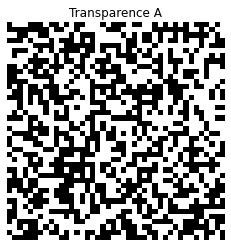

In [90]:
im_trans_A.save("/Users/eiglesias/Desktop/vcsd_test/encryptor/trans_A_gen.png")
plt.imshow(img)
plt.title('Transparence A')
plt.axis('off')
plt.show()

## Function

In [101]:
def gen_image_from_transparence(trans):
    """
    """
    trans_im = np.expand_dims(255 *trans, axis=2)
    trans_im = np.where(trans_im==[255], [255,255,255], [0,0,0]).astype(np.uint8)
    im = Image.fromarray(trans_im)
    return im

## Function in action

In [102]:
print(trans_A)

[[0 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 [1 1 0 ... 1 0 1]
 ...
 [1 1 0 ... 1 0 1]
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 1 1 0]]


In [106]:
im_A = gen_image_from_transparence(trans_A)
im_B = gen_image_from_transparence(trans_B)

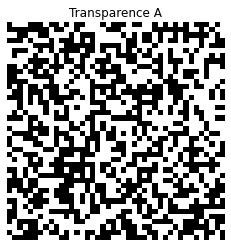

In [107]:
plt.imshow(im_A)
plt.title('Transparence A')
plt.axis('off')
plt.show()

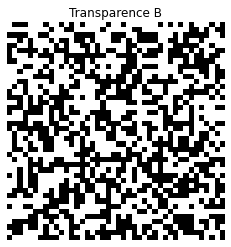

In [108]:
plt.imshow(im_B)
plt.title('Transparence B')
plt.axis('off')
plt.show()